In [3]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd /content/drive/MyDrive/manifestos

/content/drive/MyDrive/manifestos


## Load data

In [5]:
merged = pd.read_csv('manifesto_level_meta_5Jun24.csv')


### create decimal scores from meta MPD variables

In [6]:
# 501 = pro-env, 416 = pro-sustainability/anti-growth
merged['501_meta_dec']=merged['501_meta_perc']/100
merged['416_meta_dec']=merged['416_meta_perc']/100


## PLOT 1: climate, env, sust scores across party families

Figure(1250x500)


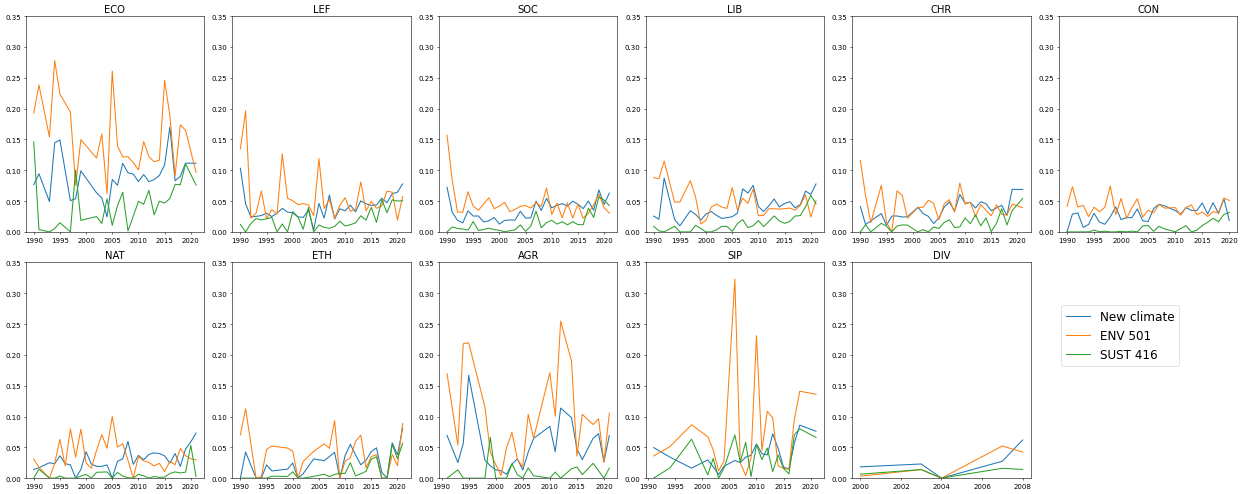

In [7]:
# group data accordingly
average_scores = merged.groupby(['parfam_name','year']).mean(numeric_only=True)[['final_broad','501_meta_dec','416_meta_dec']].reset_index()

# need list of parties, ordered in roughly left - right along political spectrum
parties = ['ECO', 'LEF', 'SOC', 'LIB', 'CHR', 'CON', 'NAT', 'ETH', 'AGR', 'SIP', 'DIV']

# Creates figure first
my_dpi = 50
fig = plt.figure(figsize=(25, 10), dpi=my_dpi)
print(fig)

# Iterate over each party and plot the scores
for i, party in enumerate(parties):
    party_data = average_scores[average_scores['parfam_name'] == party]
    # Add plots
    ax = fig.add_subplot(2, 6, i+1)
    ax.set_ylim([0, .35])
    ax.plot(party_data['year'], party_data['final_broad'],label='New climate')
    ax.plot(party_data['year'], party_data['501_meta_dec'], label='ENV 501')
    ax.plot(party_data['year'], party_data['416_meta_dec'], label='SUST 416')
    ax.set_title(party,fontsize='x-large')
    # axs[i].legend()

# Get handles and labels for legend from the current subplot
h, l = ax.get_legend_handles_labels()
# Create a single legend for all subplots
fig.legend(h, l, fontsize = 'xx-large',bbox_to_anchor=(.95, .25),loc='lower right')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
#fig.savefig('lineplot_parfam_combined_coloured')


## PLOT 2: clim, env, sust variables across countries over time

Figure(1500x1000)


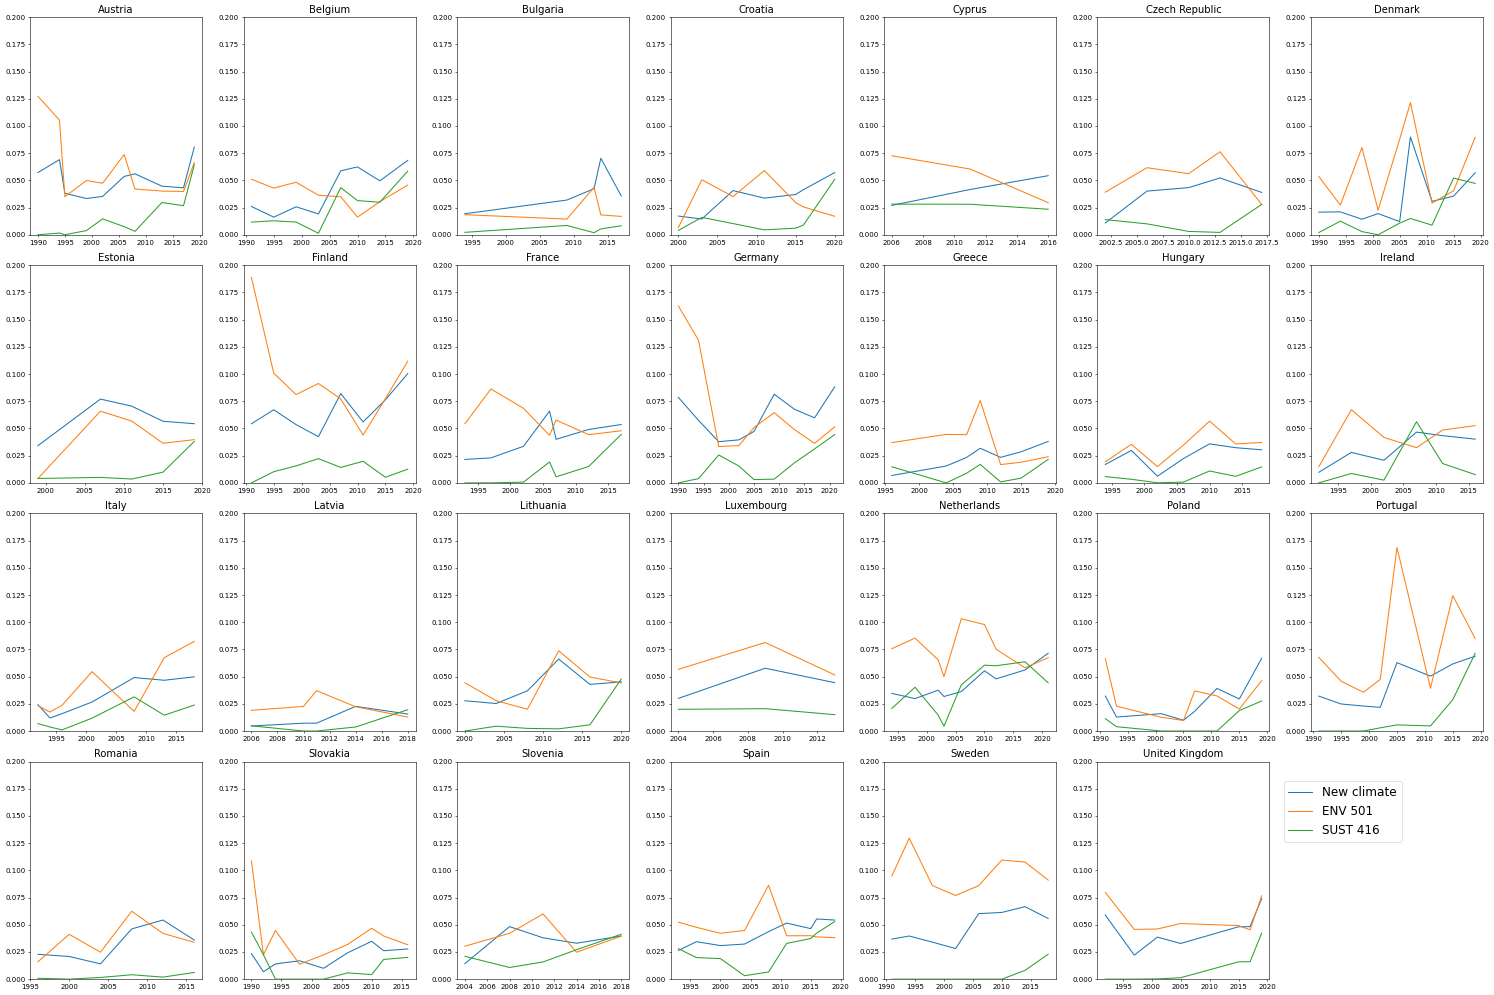

In [8]:
# group data accoridngly, this time by country
average_scores = merged.groupby(['country','year']).mean(numeric_only=True)[['final_broad','501_meta_dec','416_meta_dec']].reset_index()

countries = average_scores['country'].unique()
# Creates figure first
my_dpi = 50
fig = plt.figure(figsize=(30, 20), dpi=my_dpi)
print(fig)

# Iterate over each party and plot the scores
for i, country in enumerate(countries):
    cty_data = average_scores[average_scores['country'] == country]
    # Add plots
    ax = fig.add_subplot(4, 7, i+1)
    ax.set_ylim([0, .2])
    ax.plot(cty_data['year'], cty_data['final_broad'],label='New climate')
    ax.plot(cty_data['year'], cty_data['501_meta_dec'], label='ENV 501')
    ax.plot(cty_data['year'], cty_data['416_meta_dec'], label='SUST 416')
    ax.set_title(country,fontsize='x-large')
    # axs[i].legend()


# Get handles and labels for legend from the current subplot
h, l = ax.get_legend_handles_labels()
# Create a single legend for all subplots
fig.legend(h, l, fontsize = 'xx-large',bbox_to_anchor=(.94, .15),loc='lower right')


# Adjust layout and show the plot
plt.tight_layout()
plt.show()
#fig.savefig('lineplot_parfam_combined_coloured')

## PLOT 3: stacked area chart with climate variable for each party fam over time
- two options: one with matplotlib + pypalettes (need to install that first, next cell), the other with bokeh (also requires some extra imports, see below)

### matplotlib

In [ ]:
!pip install git+https://github.com/JosephBARBIERDARNAL/pypalettes.git

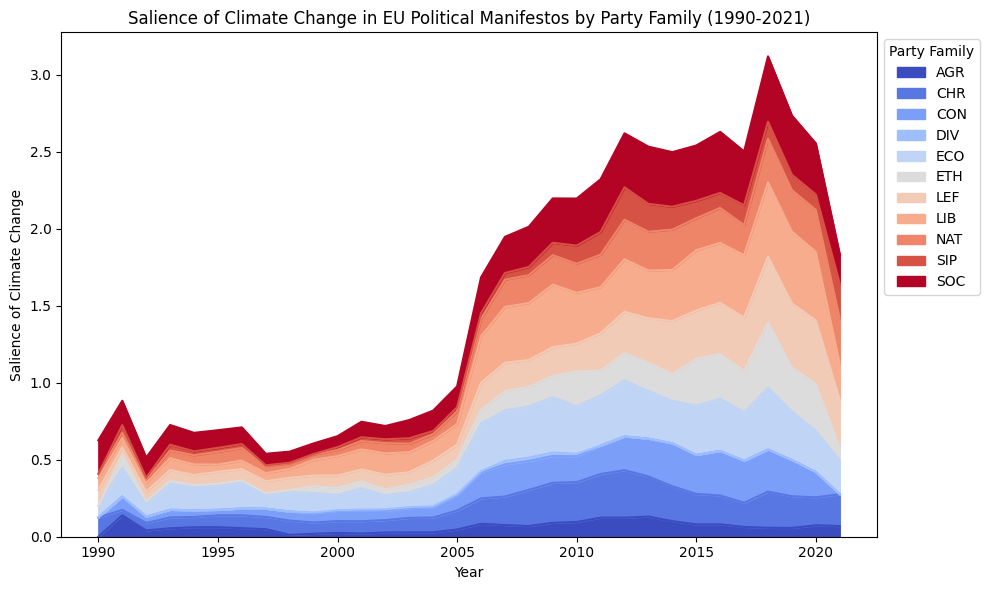

In [14]:
from pypalettes import load_cmap

# Assuming man_data is your dataframe
# Group by year and party family, then sum the salience
aggregated_data = merged.groupby(['year', 'parfam_name'])['final_broad'].sum().unstack().fillna(0)

# Apply a rolling average with a window of 3 years (you can adjust the window size as needed)
smoothed_data = aggregated_data.rolling(window=4, center=True).mean()
smoothed_data.loc[1990]=aggregated_data.loc[1990]
smoothed_data.loc[1991]=aggregated_data.loc[1991]
smoothed_data.loc[2021]=aggregated_data.loc[2021]

# Plot the stacked area chart
fig, ax = plt.subplots(figsize=(10, 6))

# Create the stacked area plot
smoothed_data.plot(kind='area', stacked=True, ax=ax, colormap='coolwarm') # 'tab20c'

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Salience of Climate Change')
ax.set_title('Salience of Climate Change in EU Political Manifestos by Party Family (1990-2021)')

# Add legend
ax.legend(title='Party Family', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


### bokeh

In [16]:
from bokeh.io import output_notebook
output_notebook()

In [18]:
from bokeh.palettes import tol
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource

# Group by year and party family, then sum the salience
aggregated_data = merged.groupby(['year', 'parfam_name'])['final_broad'].sum().unstack().fillna(0)

# Apply a rolling average with a window -- need to determine which window size makes the most sense
smoothed_data = aggregated_data.rolling(window=4, center=True).mean()
smoothed_data.loc[1990]=aggregated_data.loc[1990]
smoothed_data.loc[1991]=aggregated_data.loc[1991]
smoothed_data.loc[2021]=aggregated_data.loc[2021]

# Prepare the data for Bokeh
source = ColumnDataSource(smoothed_data.reset_index())

# List of stackers (party families)
stackers = smoothed_data.columns.tolist()


# Create a figure
p = figure(x_axis_label='Year', y_axis_label='Salience of Climate Change', title='Salience of Climate Change in EU Political Manifestos by Party Family (1990-2021)', height=600, width=800)

# Add the stacked area plot
p.varea_stack(stackers, x='year', color=tol['Sunset'][smoothed_data.shape[1]], source=source, legend_label=stackers)

# Customize the legend
p.legend.location = 'top_left'
p.legend.title = 'Party Family'

# Show the plot
show(p, notebook_handle=True)

### can also do it for select countries but not too many

In [23]:

# Group by year and party family, then sum the salience
aggregated_data = merged.groupby(['year', 'country'])['final_broad'].sum().unstack().fillna(0)[['France','Germany','Italy',
                                                                                                'Belgium','Spain','Poland','Sweden',
                                                                                                'United Kingdom','Ireland','Denmark',
                                                                                                'Austria']]

# Apply a rolling average with a window
smoothed_data = aggregated_data.rolling(window=4, center=True).mean()
smoothed_data.loc[1990]=aggregated_data.loc[1990]
smoothed_data.loc[1991]=aggregated_data.loc[1991]
#smoothed_data.loc[2021]=aggregated_data.loc[2021]

# Prepare the data for Bokeh
source = ColumnDataSource(smoothed_data.reset_index())

# List of stackers (party families)
stackers = smoothed_data.columns.tolist()

# Create a figure
p = figure(x_axis_label='Year', y_axis_label='Salience of Climate Change', title='Salience of Climate Change in EU Political Manifestos by Country (1990-2021)', height=600, width=800)

# Add the stacked area plot
p.varea_stack(stackers, x='year', color=tol['Sunset'][smoothed_data.shape[1]], source=source, legend_label=stackers)

# Customize the legend
p.legend.location = 'top_left'
p.legend.title = 'Country'

# Show the plot
show(p, notebook_handle=True)